In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Importing the data
Marketing = pd.read_csv("For Python.csv")
Marketing = Marketing.iloc[:,0:9]
Marketing.head()

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
0,01/01/2021,DE,PLA,589.0,204746,1166,0.0,0,0
1,01/01/2021,DE,Brand,164.0,1335,484,1039.0,18,5
2,01/01/2021,DE,Non-Brand,39.0,832,70,63.0,1,1
3,01/02/2021,DE,PLA,200.0,120725,541,0.0,0,0
4,01/02/2021,DE,Brand,39.0,713,277,1169.0,20,7


In [5]:
# Making sure the data types have been read in right
Marketing.dtypes

date                          object
country                       object
tpw_channels                  object
spend                        float64
impressions                    int64
clicks                         int64
revenue                      float64
transactions                   int64
new_customer_transactions      int64
dtype: object

Need to update Revenue and Date

In [6]:
Marketing['date'] = pd.to_datetime(Marketing['date'], format='%d/%m/%Y')
Marketing.dtypes
Marketing.head()

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
0,2021-01-01,DE,PLA,589.0,204746,1166,0.0,0,0
1,2021-01-01,DE,Brand,164.0,1335,484,1039.0,18,5
2,2021-01-01,DE,Non-Brand,39.0,832,70,63.0,1,1
3,2021-02-01,DE,PLA,200.0,120725,541,0.0,0,0
4,2021-02-01,DE,Brand,39.0,713,277,1169.0,20,7


# Calculating key metrics

In [7]:
# Calculate Spend to Revenue Ratio
Marketing['A:R'] = (Marketing['spend'] / Marketing['revenue']) * 100

# Calculate Average Order Value
Marketing['AOV'] = Marketing['revenue'] / Marketing['transactions']

# Calculate the Cost Per Acquisition
Marketing['CPA'] = Marketing['spend'] / Marketing['new_customer_transactions']

# Calculate the Click Through Rate
Marketing['CTR'] = (Marketing['clicks'] / Marketing['impressions']) * 100

# Calculate the Conversion Rate
Marketing['CVR'] = (Marketing['transactions'] / Marketing['clicks']) * 100

In [8]:
Marketing.dtypes

date                         datetime64[ns]
country                              object
tpw_channels                         object
spend                               float64
impressions                           int64
clicks                                int64
revenue                             float64
transactions                          int64
new_customer_transactions             int64
A:R                                 float64
AOV                                 float64
CPA                                 float64
CTR                                 float64
CVR                                 float64
dtype: object

# EDA and Data Cleaning

In [9]:
Marketing[["spend","impressions","clicks","revenue","transactions","new_customer_transactions"]].describe()

,spend,impressions,clicks,revenue,transactions,new_customer_transactions
count,315.000000,3.150000e+02,315.000000,315.000000,315.000000,315.000000
mean,3717.819048,4.789058e+05,3803.980952,8744.685714,219.609524,112.371429
std,8499.657967,1.175905e+06,5865.849342,16461.417576,418.100242,203.013707
min,0.000000,0.000000e+00,-3523.000000,0.000000,0.000000,0.000000
25%,119.000000,1.398500e+03,378.000000,507.000000,12.000000,5.500000
50%,434.000000,1.154700e+04,971.000000,1762.000000,39.000000,20.000000
75%,2542.000000,2.699175e+05,4548.500000,6048.000000,137.500000,107.000000
max,77910.000000,8.010721e+06,31444.000000,80197.000000,1957.000000,1205.000000


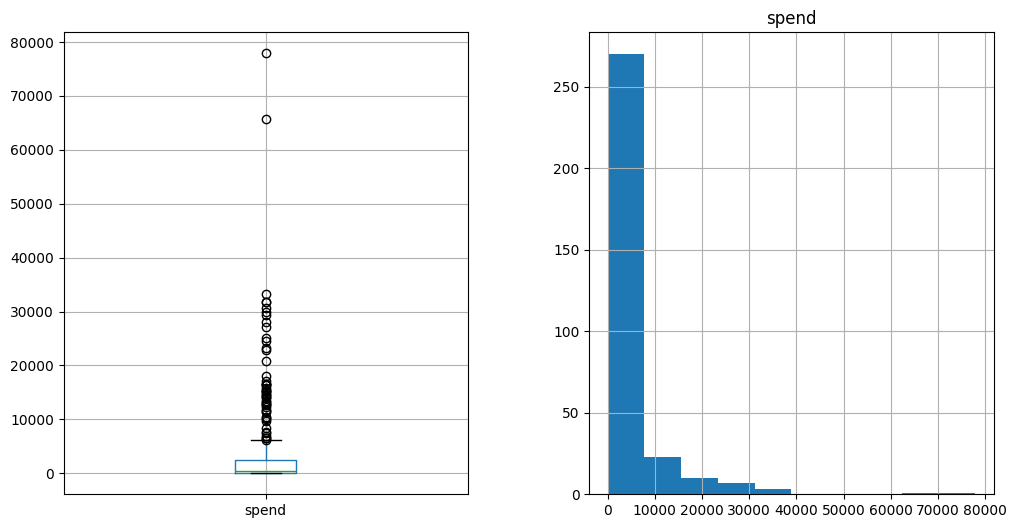

In [10]:
# Visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

Marketing.boxplot(column = "spend",ax=ax1)
Marketing.hist(column="spend",ax=ax2)
plt.show()

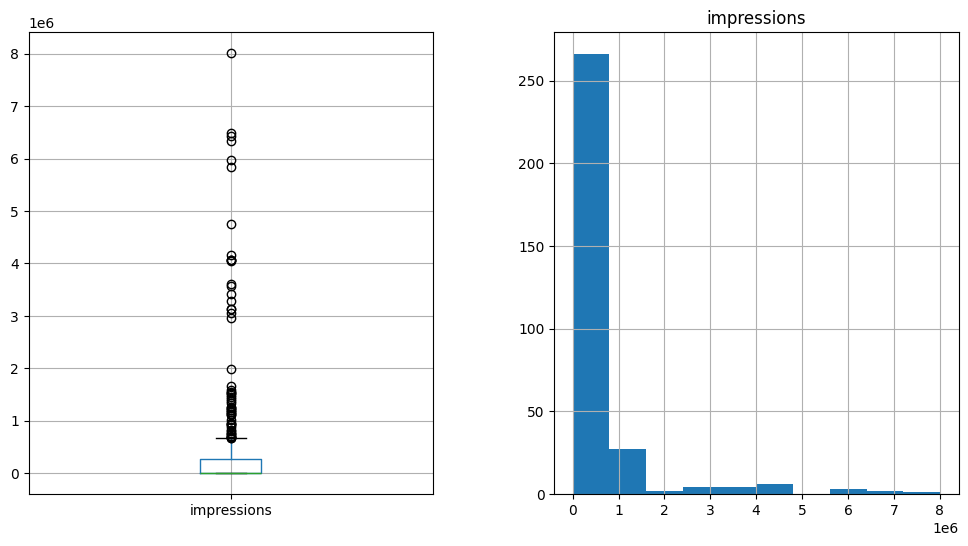

In [11]:
# Visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

Marketing.boxplot(column = "impressions",ax=ax1)
Marketing.hist(column="impressions",ax=ax2)
plt.show()

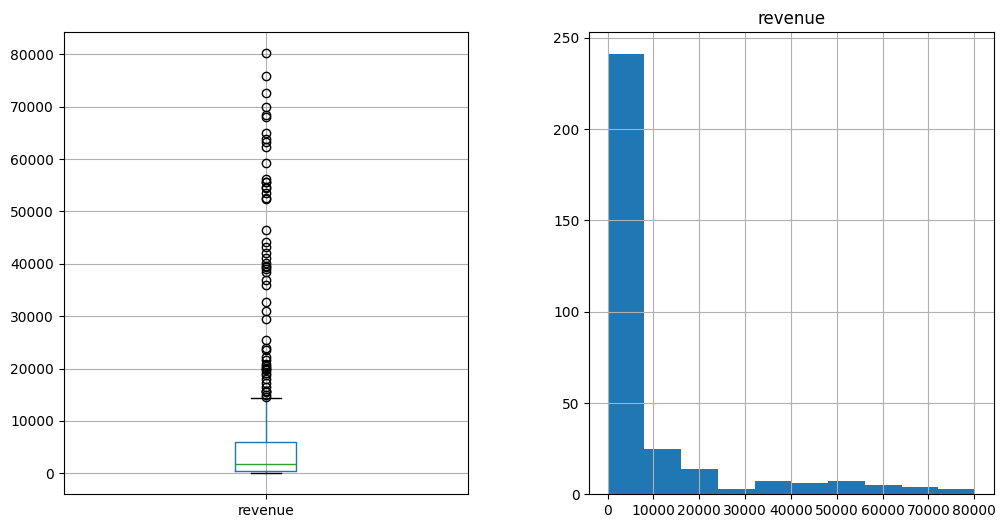

In [12]:
# Visualisations
# Visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

Marketing.boxplot(column = "revenue",ax=ax1)
Marketing.hist(column="revenue",ax=ax2)
plt.show()

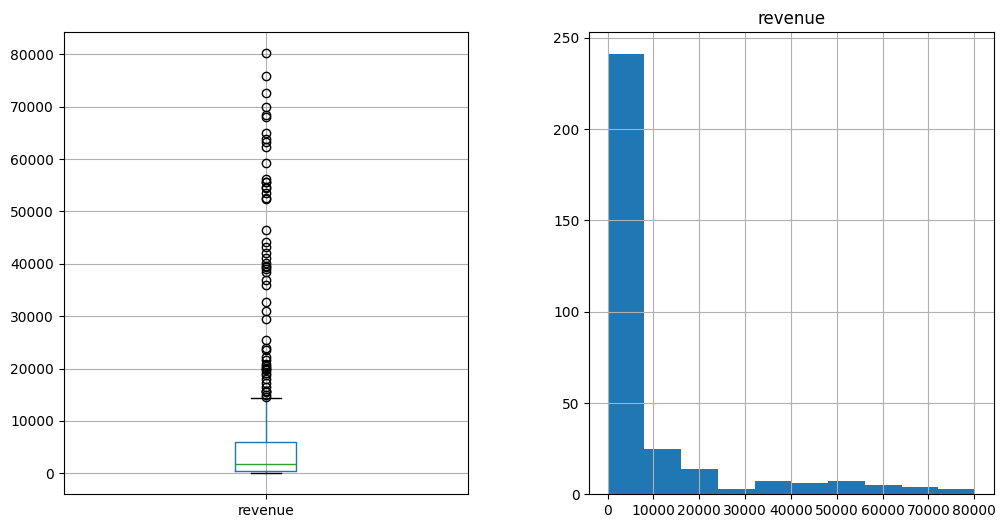

In [13]:
# Visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

Marketing.boxplot(column = "revenue",ax=ax1)
Marketing.hist(column="revenue",ax=ax2)
plt.show()

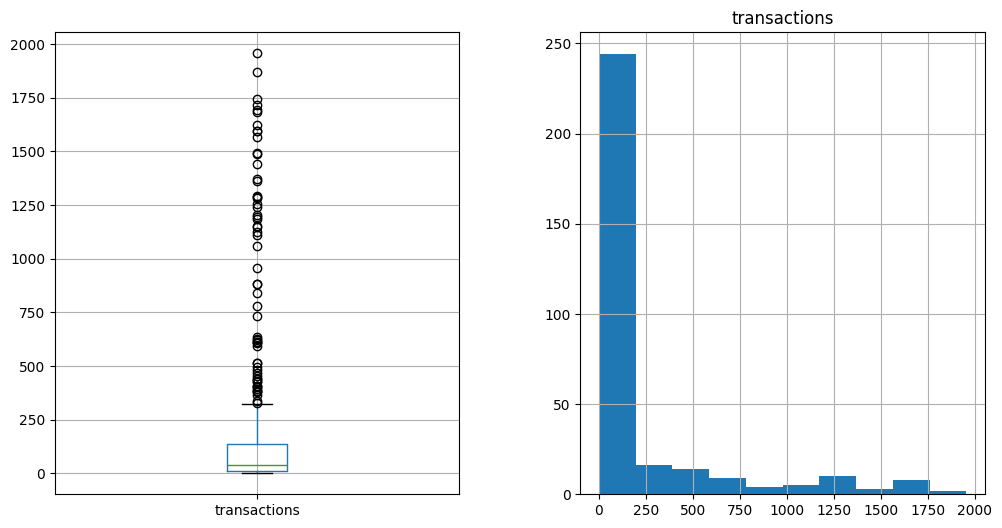

In [14]:
# Visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

Marketing.boxplot(column = "transactions",ax=ax1)
Marketing.hist(column="transactions",ax=ax2)
plt.show()

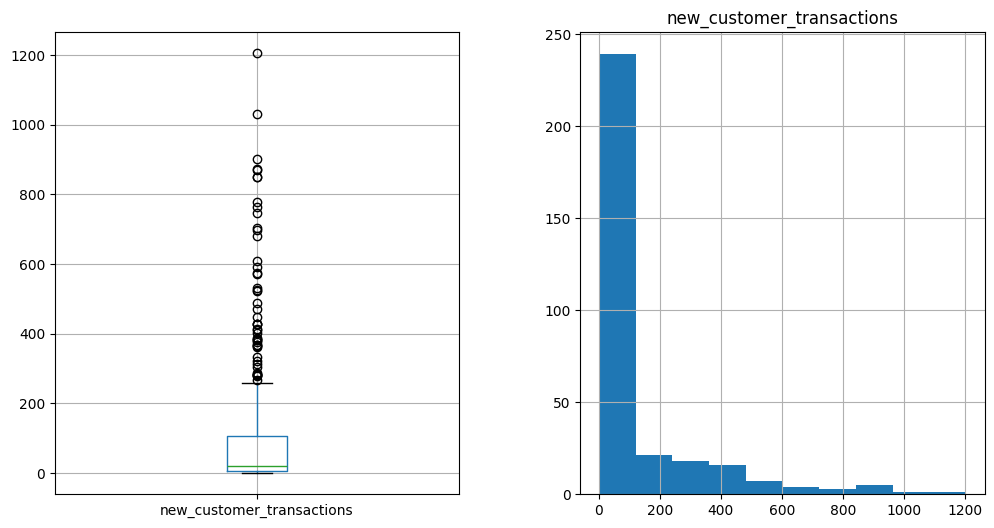

In [15]:
# Visualisations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

Marketing.boxplot(column = "new_customer_transactions",ax=ax1)
Marketing.hist(column="new_customer_transactions",ax=ax2)
plt.show()

## From EDA there were some key anomalies detected
1. Zero Values in some columns
2. Negative Values recorded in the clicks column
3. Clear outliers in spend column


In [16]:
Marketing_Investigation = Marketing.iloc[:,0:9]
Marketing_Investigation.head()

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
0,2021-01-01,DE,PLA,589.0,204746,1166,0.0,0,0
1,2021-01-01,DE,Brand,164.0,1335,484,1039.0,18,5
2,2021-01-01,DE,Non-Brand,39.0,832,70,63.0,1,1
3,2021-02-01,DE,PLA,200.0,120725,541,0.0,0,0
4,2021-02-01,DE,Brand,39.0,713,277,1169.0,20,7


## Zero Values

In [17]:
# Investigating periods with multiple missing data
missing_records = Marketing_Investigation.iloc[:,0:7].apply(lambda row: (row==0).sum(),axis=1)
results = Marketing_Investigation.iloc[:,0:7][missing_records >1]
anom_1 = results.sort_values(["country","tpw_channels","date"])
anom_1

,date,country,tpw_channels,spend,impressions,clicks,revenue
110,2022-04-01,FR,Non-Brand,0.0,0,0,10.0
113,2022-05-01,FR,Non-Brand,0.0,0,0,0.0
194,2021-02-01,IT,Non-Brand,0.0,0,0,0.0
197,2021-03-01,IT,Non-Brand,0.0,0,0,0.0
200,2021-04-01,IT,Non-Brand,0.0,0,0,0.0
218,2021-10-01,IT,Non-Brand,0.0,0,0,0.0
221,2021-11-01,IT,Non-Brand,0.0,0,0,0.0
224,2021-12-01,IT,Non-Brand,0.0,0,0,0.0
227,2022-01-01,IT,Non-Brand,0.0,0,0,0.0
230,2022-02-01,IT,Non-Brand,0.0,0,0,0.0


**Empty Records**

**France**
* **Non-Brand** Apr 2022 - May 2022

**Italy**
* **Non-Brand** Feb 2021 - Apr 2021, Oct 2021 - Sep 2022
* **PLA** Apr 2022 - Sep 2022

In [18]:
results = Marketing_Investigation.iloc[:,0:9][missing_records == 1]
results = results.sort_values(["country","tpw_channels","date"])
results

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
0,2021-01-01,DE,PLA,589.0,204746,1166,0.0,0,0
3,2021-02-01,DE,PLA,200.0,120725,541,0.0,0,0
6,2021-03-01,DE,PLA,1699.0,876702,3904,0.0,0,0
104,2022-02-01,FR,Non-Brand,1.0,28,1,0.0,0,0
63,2021-01-01,FR,PLA,422.0,142886,567,0.0,0,0
84,2021-08-01,FR,PLA,2954.0,1160683,4317,0.0,0,0
147,2021-08-01,IE,PLA,1082.0,208752,862,0.0,0,0
150,2021-09-01,IE,PLA,563.0,106130,478,0.0,0,0
191,2021-01-01,IT,Non-Brand,24.0,176,42,0.0,0,0
195,2021-03-01,IT,PLA,1851.0,1372206,5224,0.0,0,0


In [19]:
anom_2 = results[results["spend"] == 0]
anom_2

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
231,2022-03-01,IT,PLA,0.0,481,4,35.0,1,0
299,2022-04-01,UK,Non-Brand,0.0,253617,11314,15653.0,405,234


**Records that recorded no spend**

**Italy**
* **PLA** Mar 2022

**UK**
* **Non-Brand** Mar 20222

The rest of the data in this table are from failed ads , ones that generated no transactions

### Negative Clicks

In [20]:
# Any clicks a negative value
results = Marketing_Investigation[Marketing_Investigation["clicks"] < 0]
anom_3 = results
anom_3

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
77,2021-05-01,FR,Non-Brand,1008.0,33134,-3523,877.0,18,12
80,2021-06-01,FR,Non-Brand,305.0,9772,-929,428.0,11,4


**Negative Clicks**

**France**
* **Non-Brand** May 2021 - Jun 2021

### Clear Outliers in Spend column

In [21]:
results = Marketing_Investigation[Marketing_Investigation["spend"] > 50000]
anom_4 = results
anom_4

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
306,2022-07-01,UK,PLA,77910.0,3598049,21448,43229.0,1151,746
309,2022-08-01,UK,PLA,65675.0,3285332,18674,44236.0,1183,764


**Clear Outliers**

**UK**
* **PLA** May 2021 - Jun 2021

### Removing these from the dataset

In [22]:
anomalies = [anom_1,anom_2,anom_3,anom_4]
anomalies = pd.concat(anomalies, ignore_index=False)
anomalies

Marketing_Cleaned = Marketing[~Marketing.index.isin(anomalies.index)]
# Describe the cleaned DataFrame
Marketing_Cleaned.describe()

d:\Data Playground\Protein Works\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\Data Playground\Protein Works\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\Data Playground\Protein Works\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,date,spend,impressions,clicks,revenue,transactions,new_customer_transactions,A:R,AOV,CPA,CTR,CVR
count,286,286.000000,2.860000e+02,286.000000,286.000000,286.000000,286.000000,286.000000,272.000000,286.000000,286.000000,286.000000
mean,2021-10-20 14:41:07.132867072,3588.164336,5.023599e+05,4025.405594,9253.597902,232.195804,117.611888,inf,inf,inf,19.333784,5.689834
min,2021-01-01 00:00:00,1.000000,2.800000e+01,1.000000,0.000000,0.000000,0.000000,1.111111,20.666667,1.800000,0.347136,0.000000
25%,2021-06-01 00:00:00,184.000000,2.109500e+03,504.250000,686.000000,17.250000,9.000000,6.469715,36.485577,9.724425,0.527411,2.350597
50%,2021-10-01 00:00:00,554.000000,1.796700e+04,1162.000000,2022.000000,47.000000,22.000000,60.041256,40.718963,28.164021,6.514936,4.330605
75%,2022-04-01 00:00:00,2941.250000,2.926572e+05,4722.750000,7591.250000,165.750000,130.250000,80.155191,48.933480,47.882053,40.607212,7.666366
max,2022-09-01 00:00:00,33195.000000,8.010721e+06,31444.000000,80197.000000,1957.000000,1205.000000,inf,inf,inf,110.122990,19.039005
std,NaN,6746.577977,1.200071e+06,5857.362386,16816.983716,426.216159,203.200238,NaN,NaN,NaN,24.257071,4.816224


# Dealing with missing numbers in metrics

When calculating Spend to Revenue , Average Order Value and Cost Per Acquistion if there are no transactions these should be set to 0

In [23]:
Marketing_Cleaned = Marketing_Cleaned.replace([np.inf, -np.inf], 0)
Marketing_Cleaned.describe()


,date,spend,impressions,clicks,revenue,transactions,new_customer_transactions,A:R,AOV,CPA,CTR,CVR
count,286,286.000000,2.860000e+02,286.000000,286.000000,286.000000,286.000000,286.000000,272.000000,286.000000,286.000000,286.000000
mean,2021-10-20 14:41:07.132867072,3588.164336,5.023599e+05,4025.405594,9253.597902,232.195804,117.611888,90.527900,42.890326,45.647551,19.333784,5.689834
min,2021-01-01 00:00:00,1.000000,2.800000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.347136,0.000000
25%,2021-06-01 00:00:00,184.000000,2.109500e+03,504.250000,686.000000,17.250000,9.000000,5.355715,36.396564,6.697545,0.527411,2.350597
50%,2021-10-01 00:00:00,554.000000,1.796700e+04,1162.000000,2022.000000,47.000000,22.000000,47.548872,40.688372,24.129412,6.514936,4.330605
75%,2022-04-01 00:00:00,2941.250000,2.926572e+05,4722.750000,7591.250000,165.750000,130.250000,75.179513,48.497154,39.956615,40.607212,7.666366
max,2022-09-01 00:00:00,33195.000000,8.010721e+06,31444.000000,80197.000000,1957.000000,1205.000000,5325.423729,92.500846,3142.000000,110.122990,19.039005
std,NaN,6746.577977,1.200071e+06,5857.362386,16816.983716,426.216159,203.200238,345.989893,11.054184,190.578834,24.257071,4.816224


# Investigating metrics
There looks to be some pretty high maxes for some of the metrics

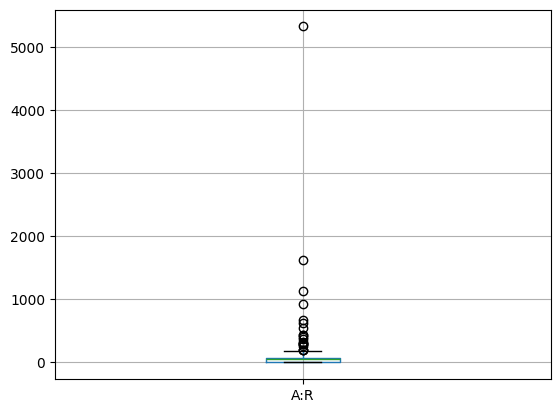

In [24]:
Marketing_Investigation_Metrics = Marketing_Cleaned
Marketing_Investigation_Metrics.boxplot(column="A:R")
plt.show()

In [25]:
# Investigating outliers
result = Marketing_Investigation_Metrics[Marketing_Investigation_Metrics["A:R"] > 5000]
anom_5 = result
anom_5

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,A:R,AOV,CPA,CTR,CVR
81,2021-07-01,FR,PLA,3142.0,1212685,4432,59.0,1,1,5325.423729,59.0,3142.0,0.36547,0.022563


**France**
* **PLA** Jul 21

This record is also the maximum CPA and lowest CVR. It has a leage spend with a lot of clicks but very little transactions. This ad *could* exist. However it is unlikely and not consistent with the other data. It will be classed as an anomly to not skew any further investigations. Each of the key metrics are off by a magnitude of 10-100

In [26]:
anomalies = pd.concat([anomalies,anom_5],ignore_index=False)
Marketing_Cleaned = Marketing_Cleaned[~Marketing_Cleaned.index.isin(anomalies.index)]
Marketing_Cleaned.describe()

,date,spend,impressions,clicks,revenue,transactions,new_customer_transactions,A:R,AOV,CPA,CTR,CVR
count,285,285.000000,2.850000e+02,285.000000,285.000000,285.000000,285.000000,285.000000,271.000000,285.000000,285.000000,285.000000
mean,2021-10-21 00:05:03.157894656,3589.729825,4.998676e+05,4023.978947,9285.859649,233.007018,118.021053,72.159845,42.830881,34.783156,19.400339,5.709719
min,2021-01-01 00:00:00,1.000000,2.800000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.347136,0.000000
25%,2021-06-01 00:00:00,183.000000,2.108000e+03,502.000000,695.000000,18.000000,9.000000,5.353494,36.364556,6.666667,0.530803,2.357379
50%,2021-10-01 00:00:00,546.000000,1.754100e+04,1158.000000,2024.000000,47.000000,22.000000,46.868403,40.686287,24.058824,6.641446,4.332206
75%,2022-04-01 00:00:00,2912.000000,2.779220e+05,4732.000000,7730.000000,167.000000,131.000000,75.130695,48.460560,39.826458,40.621404,7.669617
max,2022-09-01 00:00:00,33195.000000,8.010721e+06,31444.000000,80197.000000,1957.000000,1205.000000,1622.727273,92.500846,400.552632,110.122990,19.039005
std,NaN,6758.393280,1.201440e+06,5867.615804,16837.696746,426.744646,203.439612,152.638501,11.030994,50.707831,24.273566,4.812920


# Exporting Data to PowerBI

In [32]:
Marketing_Cleaned.to_csv("Marketing_Cleaned.csv", index=False)

# Investigating Anomalies

In [28]:
anomalies.head()

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,A:R,AOV,CPA,CTR,CVR
110,2022-04-01,FR,Non-Brand,0.0,0,0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2022-05-01,FR,Non-Brand,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,2021-02-01,IT,Non-Brand,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,2021-03-01,IT,Non-Brand,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,2021-04-01,IT,Non-Brand,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Investigating the distribution of anomalies

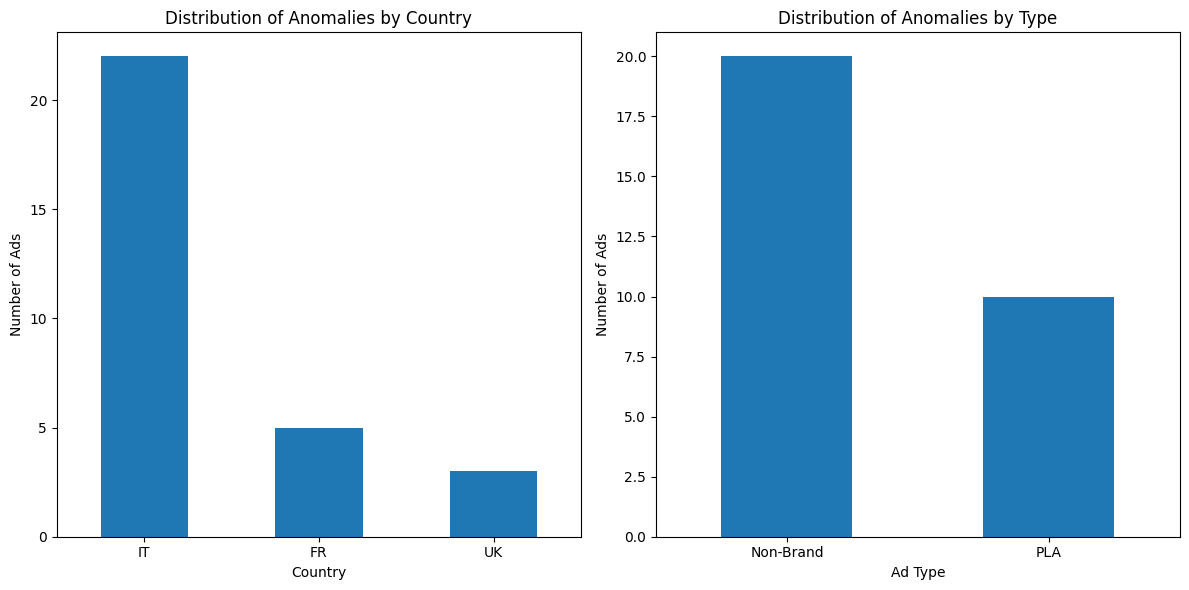

In [29]:
country_counts = anomalies['country'].value_counts()
ad_type_counts = anomalies['tpw_channels'].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
country_counts.plot(kind='bar', title='Distribution of Anomalies by Country', rot=0)
plt.xlabel('Country')
plt.ylabel('Number of Ads')

plt.subplot(1, 2, 2)
ad_type_counts.plot(kind='bar', title='Distribution of Anomalies by Type', rot=0)
plt.xlabel('Ad Type')
plt.ylabel('Number of Ads')
plt.tight_layout()
plt.show()

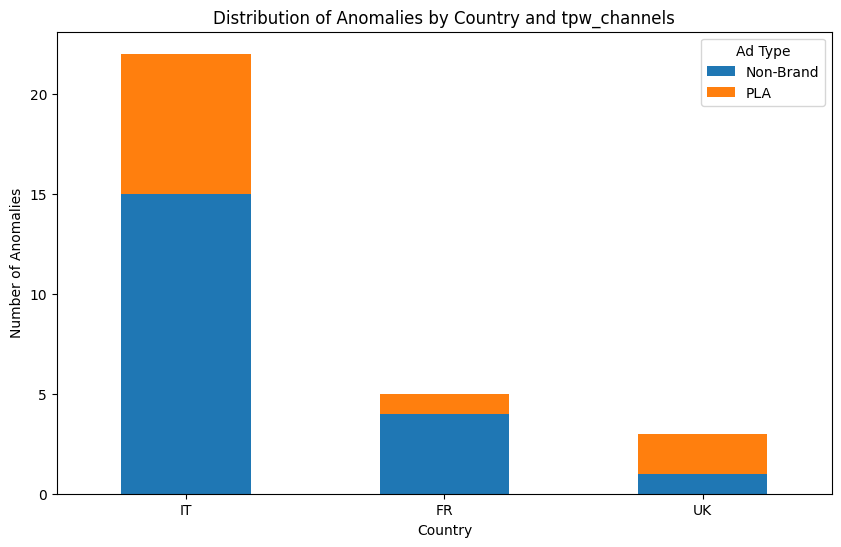

In [30]:
grouped_data = anomalies.groupby(['country', 'tpw_channels']).size().unstack(level=1)

# Specify the desired order of countries
country_order = ['IT', 'FR', 'UK']

# Reindex the grouped data to match the desired order
grouped_data = grouped_data.reindex(country_order)

# Create the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, rot=0, figsize=(10, 6))

plt.title('Distribution of Anomalies by Country and tpw_channels')
plt.xlabel('Country')
plt.ylabel('Number of Anomalies')
plt.legend(title='Ad Type')
plt.show()

In [31]:
monthly_anomalies = anomalies.groupby([pd.Grouper(key='date'), 'country','tpw_channels']).size().unstack()

monthly_anomalies["Non-Brand"]= monthly_anomalies["Non-Brand"].replace({1.0 : "anomaly", np.nan : ""})
monthly_anomalies["PLA"] = monthly_anomalies["PLA"].replace({1.0 : "anomaly", np.nan : ""})
monthly_anomalies

,tpw_channels,Non-Brand,PLA
date,country,,
2021-02-01,IT,anomaly,
2021-03-01,IT,anomaly,
2021-04-01,IT,anomaly,
2021-05-01,FR,anomaly,
2021-06-01,FR,anomaly,
2021-07-01,FR,,anomaly
2021-10-01,IT,anomaly,
2021-11-01,IT,anomaly,
2021-12-01,IT,anomaly,
